In [1]:
install.packages(c("e1071", "ggplot2", "class", "dslabs", "MASS", "dbscan"))

Installing packages into 'C:/Users/deepa/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'proxy', 'Rcpp'




package 'proxy' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked
package 'ggplot2' successfully unpacked and MD5 sums checked
package 'class' successfully unpacked and MD5 sums checked
package 'dslabs' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'dbscan' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\deepa\AppData\Local\Temp\RtmpS6fmt8\downloaded_packages


In [3]:
install.packages("ggplot2")
install.packages("dplyr")

Warning message:
"package 'ggplot2' is in use and will not be installed"
Installing package into 'C:/Users/deepa/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)

also installing the dependencies 'generics', 'tidyselect'




package 'generics' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\deepa\AppData\Local\Temp\RtmpsrcyYS\downloaded_packages


In [4]:
# Experiment 1: Data Cleaning and Visualization - airquality Dataset


# Load necessary libraries
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:ggplot2':

    vars


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [5]:

# Load the built-in dataset
data("airquality")
df <- airquality




# View the first few rows
head(df)

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


In [6]:


# Check structure
str(df)



'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


In [7]:
# Summary to observe missing values
summary(df)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

In [8]:

# Count missing values per column
colSums(is.na(df))

# Handling Missing Values:
# Option 1: Remove rows with NA
df_cleaned <- na.omit(df)

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

Ozone Solar.R    Wind    Temp   Month     Day 
      0       0       0       0       0       0

`geom_smooth()` using formula = 'y ~ x'


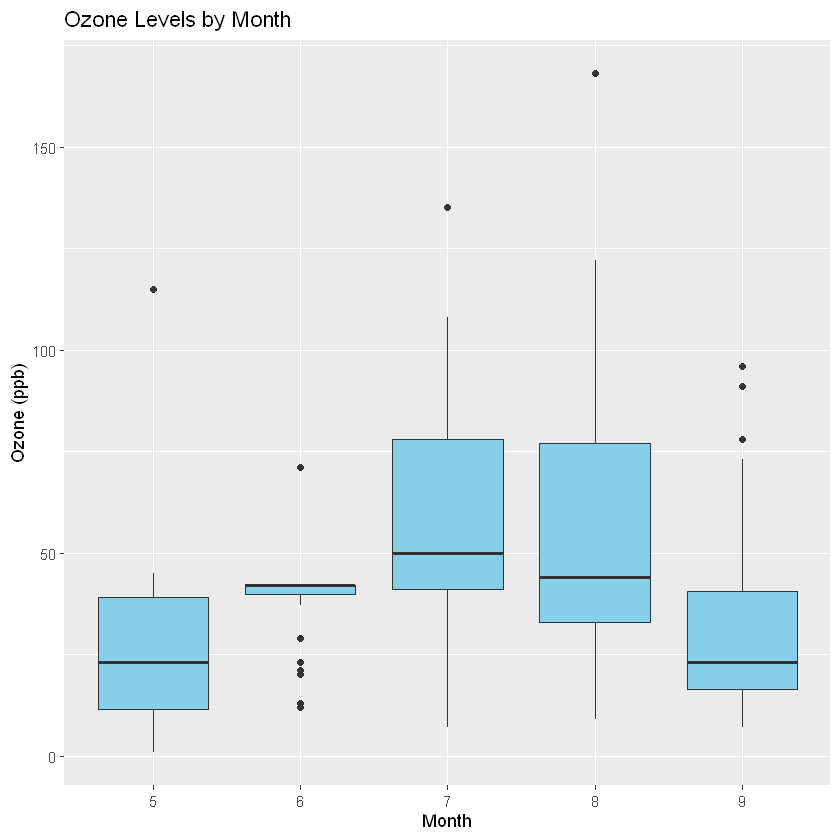

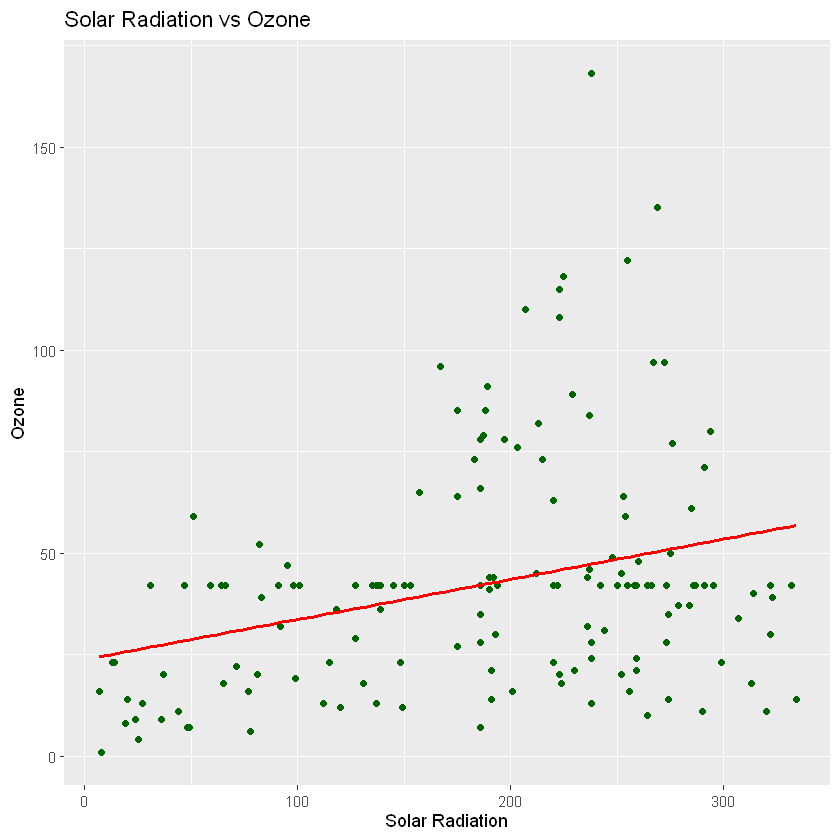

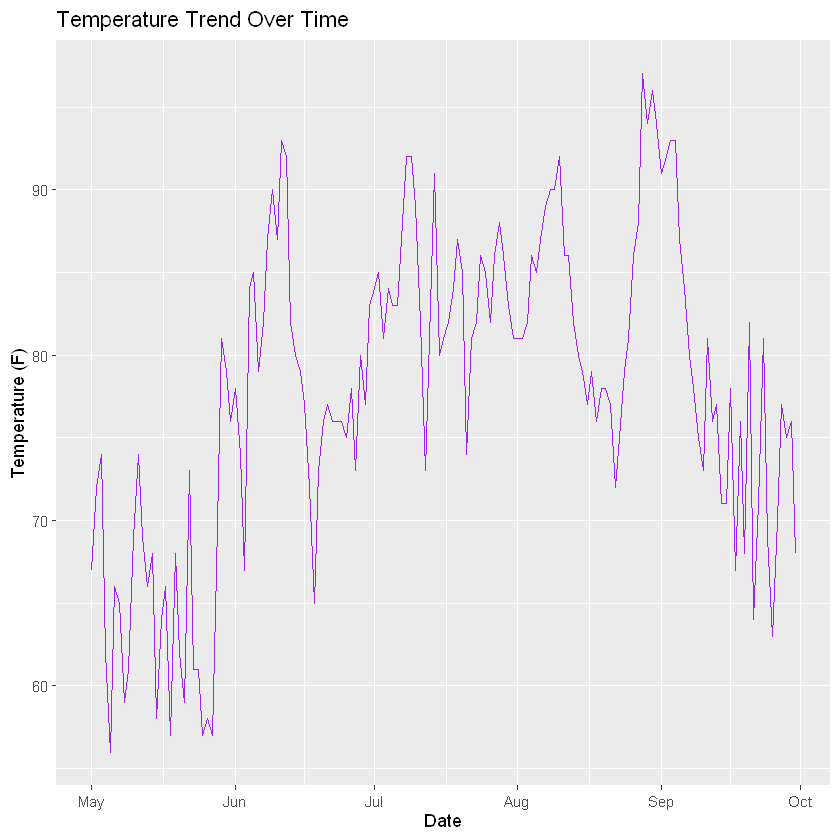

In [9]:



# Option 2: Impute missing values (mean imputation)
df_imputed <- df
df_imputed$Ozone[is.na(df_imputed$Ozone)] <- mean(df_imputed$Ozone, na.rm = TRUE)
df_imputed$Solar.R[is.na(df_imputed$Solar.R)] <- mean(df_imputed$Solar.R, na.rm = TRUE)

# After cleaning
colSums(is.na(df_imputed))

# Visualization 1: Ozone levels by Month
ggplot(df_imputed, aes(x = factor(Month), y = Ozone)) +
  geom_boxplot(fill = "skyblue") +
  labs(title = "Ozone Levels by Month", x = "Month", y = "Ozone (ppb)")

# Visualization 2: Solar Radiation vs Ozone
ggplot(df_imputed, aes(x = Solar.R, y = Ozone)) +
  geom_point(color = "darkgreen") +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Solar Radiation vs Ozone", x = "Solar Radiation", y = "Ozone")

# Visualization 3: Line plot for Temp over time
df_imputed$Date <- as.Date(paste(1973, df_imputed$Month, df_imputed$Day, sep = "-"))
ggplot(df_imputed, aes(x = Date, y = Temp)) +
  geom_line(color = "purple") +
  labs(title = "Temperature Trend Over Time", x = "Date", y = "Temperature (F)")


     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 21.00   1st Qu.:120.0   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 42.13   Median :194.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 46.00   3rd Qu.:256.0   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  

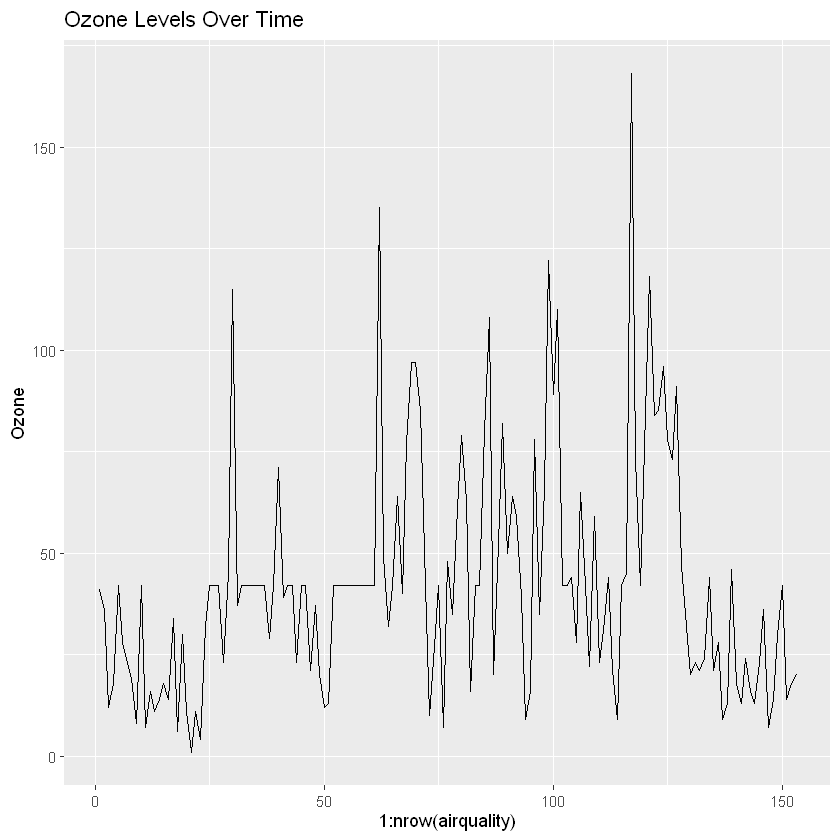

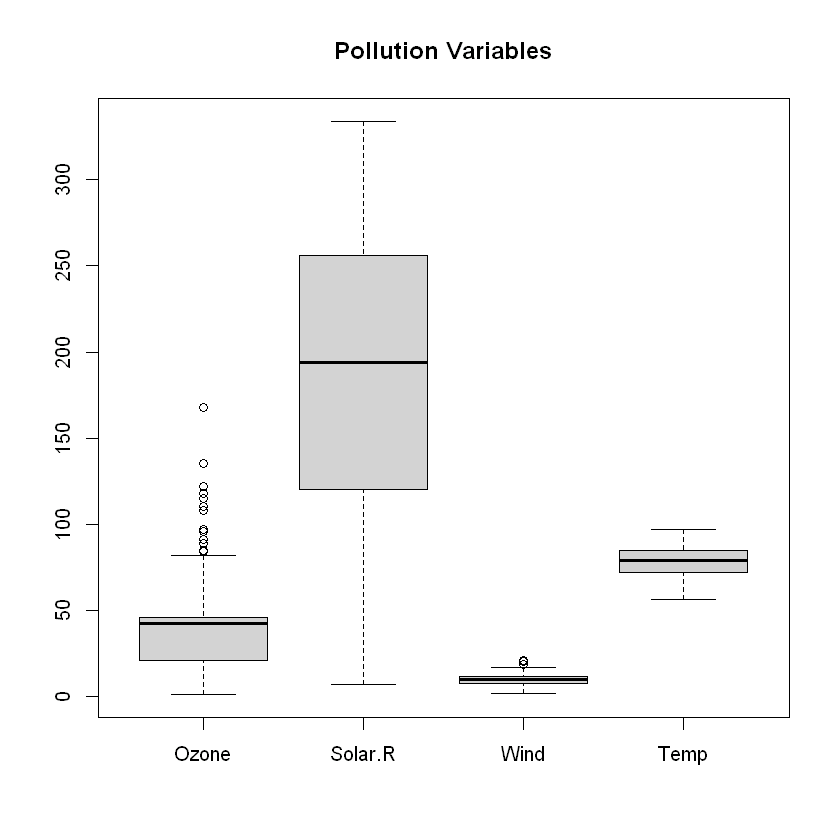

In [2]:
data(airquality)

# Check missing values
summary(airquality)

# Handling missing values by mean
for(i in 1:ncol(airquality)){
  airquality[is.na(airquality[,i]), i] <- mean(airquality[,i], na.rm = TRUE)
}

# Verify
summary(airquality)

# Visualization
library(ggplot2)
ggplot(airquality, aes(x = 1:nrow(airquality), y = Ozone)) + 
  geom_line() + labs(title = "Ozone Levels Over Time")

boxplot(airquality[,1:4], main="Pollution Variables")

